# 🧼 Feature Engineering & Data Cleaning: Titanic Dataset
**Instructor:** Sokunthaneth CHHOY

This notebook applies the concepts discussed in Session #9 to the Titanic dataset.
We will:
- Detect and handle missing values
- Encode categorical variables
- Detect and handle outliers
- Prepare a clean dataset for modeling


In [1]:
# 📥 Load the Titanic dataset
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 🔍 Detecting Missing Values

In [2]:
# Check how many missing values per column
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

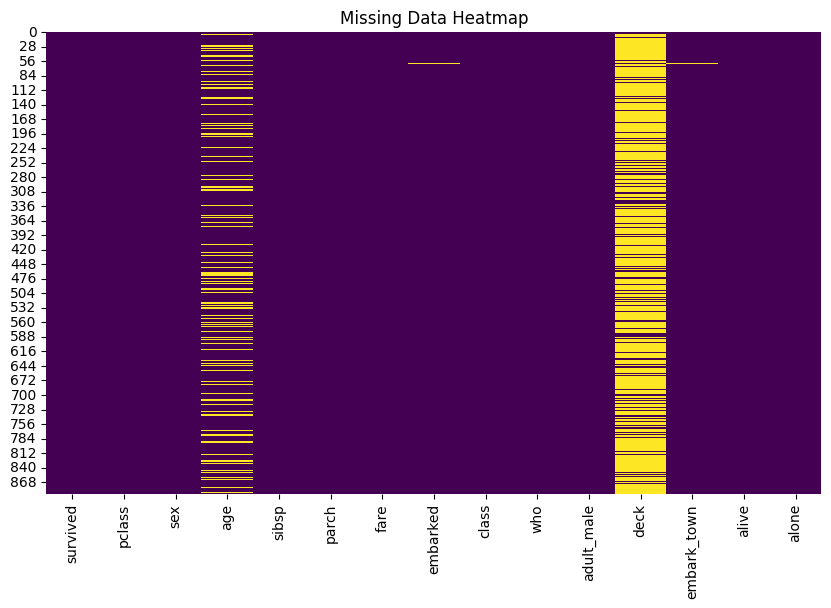

In [3]:
# Visualize missing values using heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

## 🛠️ Handling Missing Values

In [4]:
# Fill 'age' with median (simple imputation)
df['age'].fillna(df['age'].median(), inplace=True)

# Fill 'embarked' with mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Drop 'deck' due to too many missing values
df.drop(columns=['deck'], inplace=True)

# Drop rows with missing 'embark_town'
df.dropna(subset=['embark_town'], inplace=True)

df.isnull().sum()

/var/folders/_0/y84_kvr94qn118s0909pkzlc0000gn/T/ipykernel_10118/2879596116.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
/var/folders/_0/y84_kvr94qn118s0909pkzlc0000gn/T/ipykernel_10118/2879596116.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## 🔤 Encoding Categorical Variables

In [5]:
# One-hot encode 'sex' and 'embarked'
df = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# Label encode 'class' and 'who' using ordinal categories
class_order = {'Third': 0, 'Second': 1, 'First': 2}
df['class'] = df['class'].map(class_order)

who_order = {'child': 0, 'woman': 1, 'man': 2}
df['who'] = df['who'].map(who_order)

df.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,2,True,Southampton,no,False,True,False,True
1,1,1,38.0,1,0,71.2833,2,1,False,Cherbourg,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,0,1,False,Southampton,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,2,1,False,Southampton,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,0,2,True,Southampton,no,True,True,False,True


## 🚨 Outlier Detection: IQR Method

In [6]:
# Use IQR to detect outliers in 'fare'
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['fare'] < Q1 - 1.5 * IQR) | (df['fare'] > Q3 + 1.5 * IQR)]

print(f'Total outliers in fare: {len(outliers)}')

Total outliers in fare: 114


In [7]:
# Cap the upper fare to Q3 + 1.5*IQR (optional strategy)
upper_bound = Q3 + 1.5 * IQR
df['fare'] = df['fare'].apply(lambda x: min(x, upper_bound))

## 💾 Save Cleaned Dataset

In [8]:
df.to_csv('titanic_cleaned.csv', index=False)
df.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,2,True,Southampton,no,False,True,False,True
1,1,1,38.0,1,0,65.6563,2,1,False,Cherbourg,yes,False,False,False,False
2,1,3,26.0,0,0,7.9250,0,1,False,Southampton,yes,True,False,False,True
3,1,1,35.0,1,0,53.1000,2,1,False,Southampton,yes,False,False,False,True
4,0,3,35.0,0,0,8.0500,0,2,True,Southampton,no,True,True,False,True
